Creating clinical variables Excel data

In [30]:
import os
import pandas as pd

paths_clinical = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test/phenotype'

demo_list = []
outcome_list = []

for entry in os.listdir(paths_clinical):
    patient_dir = os.path.join(paths_clinical, entry)
    if not os.path.isdir(patient_dir):
        continue

    patient_name = entry
    print(f'Processing patient: {patient_name}')

    demo_file = os.path.join(patient_dir, 'ses-01', f'{patient_name}_ses-01_demographic_baseline.xlsx')
    outcome_file = os.path.join(patient_dir, 'ses-02', f'{patient_name}_ses-02_outcome.xlsx')

    # ---------------- DEMO ----------------
    if os.path.exists(demo_file):
        try:
            demo_data = pd.read_excel(demo_file)
            # If file exists but is completely empty, fill with at least one row
            if demo_data.empty:
                demo_data = pd.DataFrame({'patient_id': [patient_name]})
            else:
                demo_data['patient_id'] = patient_name
        except Exception as e:
            print(f'[ERROR] Could not read {demo_file}: {e}')
            # Fallback placeholder — always one row
            demo_data = pd.DataFrame({'patient_id': [patient_name]})
    else:
        # File missing → create placeholder with 1 row
        demo_data = pd.DataFrame({'patient_id': [patient_name]})

    demo_list.append(demo_data)

    # ---------------- OUTCOME ----------------
    if os.path.exists(outcome_file):
        try:
            outcome_data = pd.read_excel(outcome_file)
            if outcome_data.empty:
                outcome_data = pd.DataFrame({'patient_id': [patient_name]})
            else:
                outcome_data['patient_id'] = patient_name
        except Exception as e:
            print(f'[ERROR] Could not read {outcome_file}: {e}')
            outcome_data = pd.DataFrame({'patient_id': [patient_name]})
    else:
        # File missing → placeholder
        outcome_data = pd.DataFrame({'patient_id': [patient_name]})

    outcome_list.append(outcome_data)


# ---------------- CONCAT (no patients will be dropped) ----------------
all_demo_data = pd.concat(demo_list, ignore_index=True, sort=False)
all_outcome_data = pd.concat(outcome_list, ignore_index=True, sort=False)

output_dir = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test'

all_demo_data.to_excel(os.path.join(output_dir, 'all_demo_data.xlsx'), index=False)
all_outcome_data.to_excel(os.path.join(output_dir, 'all_outcome_data.xlsx'), index=False)

print('Saved all_demo_data.xlsx and all_outcome_data.xlsx')


Processing patient: sub-stroke0228
Processing patient: sub-stroke0199
Processing patient: sub-stroke0205
Processing patient: sub-stroke0060
Processing patient: sub-stroke0216
Processing patient: sub-stroke0225
Processing patient: sub-stroke0223
Processing patient: sub-stroke0245
Processing patient: sub-stroke0072
Processing patient: sub-stroke0121
Processing patient: sub-stroke0035
Processing patient: sub-stroke0236
Processing patient: sub-stroke0018
Processing patient: sub-stroke0229
Processing patient: sub-stroke0224
Processing patient: sub-stroke0215
Processing patient: sub-stroke0214
Processing patient: sub-stroke0219
Processing patient: sub-stroke0231
Processing patient: sub-stroke0247
Processing patient: sub-stroke0127
Processing patient: sub-stroke0204
Processing patient: sub-stroke0248
Processing patient: sub-stroke0129
Processing patient: sub-stroke0196
Processing patient: sub-stroke0208
Processing patient: sub-stroke0220
Processing patient: sub-stroke0222
Processing patient: 

In [31]:
print(len(demo_list))

98


In [35]:
all_demo_data

,Center,Sex,Age,Atrial fibrillation,Hypertension,Diabetes,Hyperlipidemia,Anticoagulation,Lipid lowering drugs,PAIs,...,NIHSS at admission,mRS at admission,mRS premorbid,Door to imaging,Door to groin,Door to first series,Time of intervention,Door to recanalization,patient_id,Statins
0,1.0,M,71.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,0.0,00:04:12,01:01:45,01:16:45.600000,00:10:18,01:25:08.400000,sub-stroke0228,NaN
1,2.0,F,24.780822,0.0,0.0,0.0,0.0,NaN,0.0,1.0,...,13.0,NaN,NaN,00:35:00,01:20:00,NaN,NaN,NaN,sub-stroke0199,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub-stroke0205,NaN
3,1.0,M,57.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,4.0,0.0,00:13:26.400000,01:20:48,01:37:01.200000,00:47:00,02:20:09.600000,sub-stroke0060,NaN
4,2.0,M,79.772603,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub-stroke0216,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.0,F,92.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.0,4.0,1.0,00:03:00,00:48:00,01:04:00,00:36:00,01:38:00,sub-stroke0023,NaN
95,1.0,M,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,1.0,00:11:00,01:04:21,01:13:43.800000,00:29:07.200000,01:43:01.200000,sub-stroke0249,NaN
96,1.0,M,75.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,21.0,5.0,1.0,00:05:42,02:17:12,02:46:04.800000,00:35:42,03:21:45.600000,sub-stroke0233,NaN
97,1.0,M,42.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,4.0,0.0,00:10:00,01:15:11.400000,01:15:55.200000,00:46:31.800000,01:56:24,sub-stroke0230,NaN


In [32]:
# numcases of all_demo_data
num_cases = all_demo_data.shape[0]
print(f'Number of cases in all_demo_data: {num_cases}')

Number of cases in all_demo_data: 99


In [34]:
## check number of cases in test set. 
import os 
preprocessed_data = "/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test/h5_files_preprocessed"
num_cases = len(os.listdir(preprocessed_data))
print(f'Number of preprocessed cases in test set: {num_cases}')

Number of preprocessed cases in test set: 98


In [7]:
import os
from pathlib import Path
import pandas as pd
p = Path("/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test/phenotype/sub-stroke0193/ses-01/sub-stroke0193_ses-01_demographic_baseline.xlsx")
print("size:", p.stat().st_size)
try:
    x = pd.ExcelFile(p)
    print("sheets:", x.sheet_names)
except Exception as e:
    print("read error:", e)

size: 10585
sheets: []


/home/cansu/miniconda3/envs/3dunet/lib/python3.12/site-packages/openpyxl/reader/workbook.py:84: UserWarning: File contains an invalid specification for 0. This will be removed
  warn(msg)


Creating all initial point images (6 modalities in the initial point)

In [17]:
import os 
import numpy as np
import pandas as pd
import SimpleITK as sitk  
import h5py

paths_raw = '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data'
paths_derivatives = '/media/cansu/DiskSpace/Cansu/ISLES24/train/derivatives'

save_path = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files/'

# craete save path if it does not exist
if not os.path.exists(save_path):
    os.makedirs(save_path)

for file in os.listdir(paths_raw):
    patient_name = file.split('.')[0]
    ncct_img = os.path.join(paths_raw, patient_name, 'ses-01', f'{patient_name}_ses-01_ncct.nii.gz')
    cta_img = os.path.join(paths_derivatives, patient_name, 'ses-01', f'{patient_name}_ses-01_space-ncct_cta.nii.gz')
    cbf_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_cbf.nii.gz')
    cbv_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_cbv.nii.gz')
    mtt_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_mtt.nii.gz')
    tmax_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_tmax.nii.gz')
    gt_label = os.path.join(paths_derivatives, patient_name, 'ses-02', f'{patient_name}_ses-02_space-ncct_lesion-msk.nii.gz')

    # read all these images and then print their shapes
    ncct = sitk.ReadImage(ncct_img)
    cta = sitk.ReadImage(cta_img)
    cbf = sitk.ReadImage(cbf_img)
    cbv = sitk.ReadImage(cbv_img)
    mtt = sitk.ReadImage(mtt_img)
    tmax = sitk.ReadImage(tmax_img) 
    gt = sitk.ReadImage(gt_label)

    # convert all the images to numpy array and then concatenate them along a new axis
    ncct_np = sitk.GetArrayFromImage(ncct)
    cta_np = sitk.GetArrayFromImage(cta)
    cbf_np = sitk.GetArrayFromImage(cbf)       
    cbv_np = sitk.GetArrayFromImage(cbv)
    mtt_np = sitk.GetArrayFromImage(mtt)
    tmax_np = sitk.GetArrayFromImage(tmax)
    gt_np = sitk.GetArrayFromImage(gt)

    all_modalities = np.stack([ncct_np, cta_np, cbf_np, cbv_np, mtt_np, tmax_np], axis=0)
    print(f'Patient: {patient_name}, All modalities shape: {all_modalities.shape}')

    # save numpy array all modalities and the gt as h5 file
    with h5py.File(os.path.join(save_path, f'{patient_name}_ses-01_all_modalities.h5'), 'w') as hf:
        hf.create_dataset('data', data=all_modalities)
        hf.create_dataset('label', data=gt_np)

Patient: sub-stroke0098, All modalities shape: (6, 74, 619, 512)
Patient: sub-stroke0166, All modalities shape: (6, 40, 609, 512)
Patient: sub-stroke0076, All modalities shape: (6, 75, 643, 512)
Patient: sub-stroke0083, All modalities shape: (6, 69, 539, 512)
Patient: sub-stroke0093, All modalities shape: (6, 69, 590, 512)
Patient: sub-stroke0150, All modalities shape: (6, 84, 512, 512)
Patient: sub-stroke0155, All modalities shape: (6, 34, 620, 512)
Patient: sub-stroke0168, All modalities shape: (6, 46, 646, 512)
Patient: sub-stroke0170, All modalities shape: (6, 85, 512, 512)
Patient: sub-stroke0186, All modalities shape: (6, 70, 581, 512)
Patient: sub-stroke0113, All modalities shape: (6, 74, 613, 512)
Patient: sub-stroke0180, All modalities shape: (6, 34, 642, 512)
Patient: sub-stroke0115, All modalities shape: (6, 64, 593, 512)
Patient: sub-stroke0175, All modalities shape: (6, 39, 633, 512)
Patient: sub-stroke0021, All modalities shape: (6, 74, 531, 512)
Patient: sub-stroke0108, 

In [29]:
# check all saved h5 files their sizes, label sizes and if their labels are empty or not
import h5py
for file in os.listdir("/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files"):
    if file.endswith('.h5'):
        with h5py.File(os.path.join("/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files", file), 'r') as hf:
            data = hf['data'][:]
            label = hf['label'][:]
            print(f'File: {file}, Data shape: {data.shape}, Label shape: {label.shape}, Label sum: {label.sum()}')

File: sub-stroke0095_ses-01_all_modalities.h5, Data shape: (6, 71, 512, 512), Label shape: (71, 512, 512), Label sum: 358954.0
File: sub-stroke0171_ses-01_all_modalities.h5, Data shape: (6, 83, 512, 512), Label shape: (83, 512, 512), Label sum: 3.0
File: sub-stroke0162_ses-01_all_modalities.h5, Data shape: (6, 44, 661, 512), Label shape: (44, 661, 512), Label sum: 0.0
File: sub-stroke0006_ses-01_all_modalities.h5, Data shape: (6, 64, 544, 512), Label shape: (64, 544, 512), Label sum: 265018.0
File: sub-stroke0003_ses-01_all_modalities.h5, Data shape: (6, 70, 633, 512), Label shape: (70, 633, 512), Label sum: 2217.0
File: sub-stroke0085_ses-01_all_modalities.h5, Data shape: (6, 75, 512, 512), Label shape: (75, 512, 512), Label sum: 24558.0
File: sub-stroke0098_ses-01_all_modalities.h5, Data shape: (6, 74, 619, 512), Label shape: (74, 619, 512), Label sum: 300178.0
File: sub-stroke0054_ses-01_all_modalities.h5, Data shape: (6, 70, 553, 512), Label shape: (70, 553, 512), Label sum: 32561.

Dividing train / val / test sets 

In [2]:
# divide dataset inti 80 - 10 -10 
import os
import numpy as np
import random
data_path = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files/'
all_files = [f for f in os.listdir(data_path) if f.endswith('.h5')]
all_files.sort()

random.seed(42)
random.shuffle(all_files)
num_total = len(all_files)
num_train = int(0.8 * num_total)
num_val = int(0.1 * num_total)  
train_files = all_files[:num_train]
val_files = all_files[num_train:num_train + num_val]
test_files = all_files[num_train + num_val:]

# create splits directory if it does not exist
splits_path = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/splits/'
if not os.path.exists(splits_path):
    os.makedirs(splits_path)

# save the file names in txt files
with open('/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/splits/train_files.txt', 'w') as f:
    for item in train_files:
        f.write("%s\n" % item)

with open('/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/splits/val_files.txt', 'w') as f:
    for item in val_files:
        f.write("%s\n" % item)

with open('/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/splits/test_files.txt', 'w') as f:
    for item in test_files:
        f.write("%s\n" % item)

print(f'Total files: {num_total}, Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}')

Total files: 149, Train: 119, Val: 14, Test: 16


Dataset - Dataloaders

In [3]:
import os
import torch
import numpy as np
from glob import glob
from torch.utils.data import Dataset
import h5py

class ISLES24(Dataset):
    """ ISLES24 Dataset """

    def __init__(self, base_dir=None, split='train', transform=None):
        self._base_dir = base_dir
        self.transform = transform
        self.sample_list = []

        if split == 'train':
            path = self._base_dir + f'/splits/train_files.txt'
            with open(path, 'r') as f:
                self.image_list = f.readlines()

        elif split == 'val':
            path = self._base_dir + f'/splits/val_files.txt'
            with open(path, 'r') as f:
                self.image_list = f.readlines()

        elif split == 'test':
            path = self._base_dir + f'/splits/test_files.txt'
            with open(path, 'r') as f:
                self.image_list = f.readlines()
        else:
            raise ValueError(f"Unsupported split: {split}. Only 'train' is supported.")

        self.image_list = [item.replace('\n', '').split(",")[0] for item in self.image_list]
        print('self.image_list = ', self.image_list)
        print("Total {} samples in training set.".format(len(self.image_list)))

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        
        if isinstance(idx, str):
            image_name = idx
        else:
            image_name = self.image_list[idx]

        h5f = h5py.File(self._base_dir + "/data/{}.h5".format(image_name), 'r')
        image = h5f['image'][:]
        label = h5f['label'][:]
        sample = {'image': image, 'label': label.astype(np.uint8)}
        if self.transform:
            sample = self.transform(sample)
        sample["idx"] = idx
        
        return sample
    
train_dataset = ISLES24(base_dir='/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data', split='train')
val_dataset = ISLES24(base_dir='/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data', split='val')
test_dataset = ISLES24(base_dir='/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data', split='test')
print(f'Train dataset length: {len(train_dataset)}')
print(f'Validation dataset length: {len(val_dataset)}')
print(f'Test dataset length: {len(test_dataset)}')

self.image_list =  ['sub-stroke0171_ses-01_all_modalities.h5', 'sub-stroke0040_ses-01_all_modalities.h5', 'sub-stroke0057_ses-01_all_modalities.h5', 'sub-stroke0166_ses-01_all_modalities.h5', 'sub-stroke0020_ses-01_all_modalities.h5', 'sub-stroke0168_ses-01_all_modalities.h5', 'sub-stroke0173_ses-01_all_modalities.h5', 'sub-stroke0156_ses-01_all_modalities.h5', 'sub-stroke0091_ses-01_all_modalities.h5', 'sub-stroke0045_ses-01_all_modalities.h5', 'sub-stroke0114_ses-01_all_modalities.h5', 'sub-stroke0165_ses-01_all_modalities.h5', 'sub-stroke0145_ses-01_all_modalities.h5', 'sub-stroke0181_ses-01_all_modalities.h5', 'sub-stroke0054_ses-01_all_modalities.h5', 'sub-stroke0142_ses-01_all_modalities.h5', 'sub-stroke0185_ses-01_all_modalities.h5', 'sub-stroke0109_ses-01_all_modalities.h5', 'sub-stroke0101_ses-01_all_modalities.h5', 'sub-stroke0105_ses-01_all_modalities.h5', 'sub-stroke0115_ses-01_all_modalities.h5', 'sub-stroke0103_ses-01_all_modalities.h5', 'sub-stroke0066_ses-01_all_modalit

In [15]:
import argparse
import logging
import os
import random
import shutil
import sys
import time

import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tensorboardX import SummaryWriter
from torch.nn import BCEWithLogitsLoss
from torch.nn.modules.loss import CrossEntropyLoss
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
from tqdm import tqdm
from dataset import (ISLES24, CenterCrop, RandomCrop,
                                   RandomRotFlip, ToTensor)
from networks import unet_3D
# from val_3D import test_all_case
from torch.cuda.amp import GradScaler, autocast
from utils import DiceLoss
from tqdm import tqdm

db_train = ISLES24(base_dir="/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data",
                        split='train',
                        transform=transforms.Compose([
                            RandomRotFlip(),
                            RandomCrop([96, 96, 96]),
                            ToTensor(),
                        ]),
                        )

def worker_init_fn(worker_id):
    random.seed(1 + worker_id)

trainloader = DataLoader(db_train, batch_size=4, shuffle=True,
                            num_workers=8, pin_memory=True, worker_init_fn=worker_init_fn)

# # # iterate once over the trainloader and report how many samples have empty labels

# # empty_samples = []  # list of (iter_index, batch_idx_in_iter, sample_idx, filename_if_available)
# # total_samples = 0

# # for iter_idx, sampled_batch in enumerate(tqdm(trainloader, desc="Checking labels")):
# #     labels = sampled_batch["label"]
# #     # ensure torch tensor
# #     if isinstance(labels, np.ndarray):
# #         labels = torch.from_numpy(labels)
# #     # normalize shape to (B, D, H, W)
# #     if labels.dim() == 4:  # (D,H,W) -> add batch dim
# #         labels = labels.unsqueeze(0)
# #     if labels.dim() == 5 and labels.shape[1] == 1:  # (B,1,D,H,W) -> (B,D,H,W)
# #         labels = labels.squeeze(1)

# #     batch_size = labels.shape[0]
# #     # per-sample sums
# #     sums = labels.view(batch_size, -1).sum(dim=1)

# #     # try to obtain sample indices / filenames from the batch
# #     batch_idx_field = sampled_batch.get("idx", None)
# #     for b in range(batch_size):
# #         total_samples += 1
# #         s = sums[b].item()
# #         sample_idx = None
# #         filename = None
# #         # extract provided idx if possible
# #         if batch_idx_field is not None:
# #             try:
# #                 if isinstance(batch_idx_field, (list, tuple)):
# #                     sample_idx = batch_idx_field[b]
# #                 elif isinstance(batch_idx_field, torch.Tensor) or isinstance(batch_idx_field, np.ndarray):
# #                     sample_idx = int(batch_idx_field[b].item())
# #                 else:
# #                     sample_idx = batch_idx_field
# #             except Exception:
# #                 sample_idx = batch_idx_field
# #         # if we have the db_train image list and sample_idx is integer, get filename
# #         try:
# #             if isinstance(sample_idx, int):
# #                 filename = db_train.image_list[sample_idx]
# #         except Exception:
# #             filename = None

# #         if s == 0:
# #             empty_samples.append((iter_idx, b, sample_idx, filename))

# # # summary
# # print(f"Total samples checked: {total_samples}")
# # print(f"Number of samples with empty label: {len(empty_samples)}")
# # if empty_samples:
# #     print("First 20 empty examples (iter_idx, batch_pos, sample_idx, filename):")
# #     for ex in empty_samples[:20]:
# #         print(ex)

Total 117 samples in training set.


In [25]:
import matplotlib.pyplot as plt

batch = next(iter(trainloader))
images = batch['image']  # expected shape: (B, C, D, H, W)
labels = batch['label']  # expected shape: (B, D, H, W) 

# pick first sample in batch
img = images[0]  # (1, C, D, H, W)
print('img shape = ', img.shape)

lbl = labels[0] # shape is (D, H, W)

img shape =  torch.Size([6, 96, 96, 96])


In [ ]:
np_label = sampled_batch["label"].numpy()
print(np_label.shape)

first_labelnp = np_label[0]

# in which slices first_labelnp has lesion regions?
slices = np.where(first_labelnp.sum(axis=(1,2))>0)
print('slices with lesion regions = ', slices)

(2, 96, 96, 96)
slices with lesion regions =  (array([], dtype=int64),)


img shape =  torch.Size([6, 96, 96, 96])


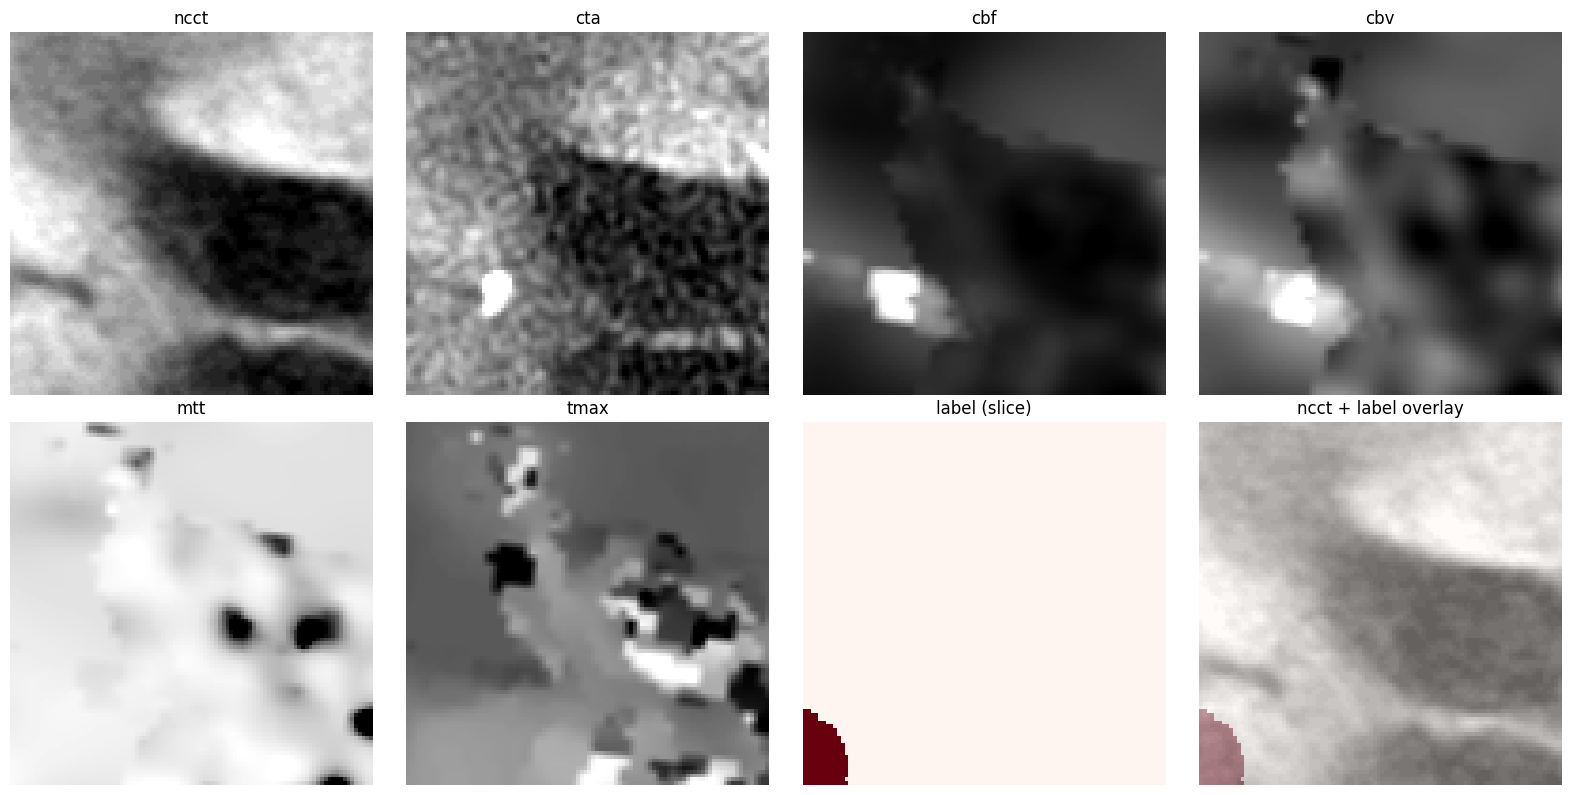

In [19]:
# visualize the input data (6 channels) and the label from one batch
# assumes trainloader is already defined (from previous cells) and plt is available

import matplotlib.pyplot as plt

batch = next(iter(trainloader))
images = batch['image']  # expected shape: (B, C, D, H, W)
labels = batch['label']  # expected shape: (B, D, H, W) 

# pick first sample in batch
img = images[0]  # (1, C, D, H, W)
print('img shape = ', img.shape)

lbl = labels[0] # shape is (D, H, W)

# handle possible channel dim in label
if lbl.ndim == 4 and lbl.shape[0] == 1:
    lbl = lbl[0]  # (D, H, W)

# move to cpu numpy
img_np = img.detach().cpu().numpy()
lbl_np = lbl.detach().cpu().numpy()

C, D, H, W = img_np.shape

z = D // 2  # middle slice index

channel_names = ['ncct', 'cta', 'cbf', 'cbv', 'mtt', 'tmax'] if C >= 6 else [f'ch{i}' for i in range(C)]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# show the 6 channels
for i in range(min(C, 6)):
    sl = img_np[i, z]  # (H, W)
    vmin, vmax = np.percentile(sl, (1, 99))
    axes[i].imshow(sl, cmap='gray', vmin=vmin, vmax=vmax)
    axes[i].set_title(channel_names[i])
    axes[i].axis('off')

# plot label slice
label_slice = lbl_np[z]
axes[6].imshow(label_slice, cmap='Reds')
axes[6].set_title('label (slice)')
axes[6].axis('off')

# overlay label on first channel for context
overlay = img_np[0, z]
vmin, vmax = np.percentile(overlay, (1, 99))
axes[7].imshow(overlay, cmap='gray', vmin=vmin, vmax=vmax)
axes[7].imshow(label_slice, cmap='Reds', alpha=0.4)
axes[7].set_title('ncct + label overlay')
axes[7].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# visualize the input data 6 channels and the label from image in the batch 
import matplotlib.pyplot as plt



In [1]:
import numpy as np
from torchvision import transforms
from dataset import RandomCrop, ToTensor

sample = {
    'image': np.random.rand(6, 128, 128, 128),
    'label': np.random.randint(0, 2, (128, 128, 128))
}

random_crop = RandomCrop(output_size=(96, 96, 96))
cropped = random_crop(sample)
print("After RandomCrop:", cropped['image'].shape, cropped['label'].shape)

to_tensor = ToTensor()
tensor_sample = to_tensor(cropped)
print("After ToTensor:", tensor_sample['image'].shape, tensor_sample['label'].shape)


After RandomCrop: (6, 96, 96, 96) (96, 96, 96)
After ToTensor: torch.Size([6, 96, 96, 96]) torch.Size([96, 96, 96])


In [1]:
class RandomCrop(object):
    """
    Crop randomly the image in a sample
    Args:
    output_size (int): Desired output size
    """

    def __init__(self, output_size, with_sdf=False):
        self.output_size = output_size
        self.with_sdf = with_sdf

    def __call__(self, sample):
        image, label = sample['image'], sample['label']
        print(image.shape, label.shape) # 6, d, h, w and 1, d, h, w

        # add one dimension to label 
        label = np.expand_dims(label, axis=0) # shape: (1, d, h, w)

        # add one dimension to output shape for consistency from (d, h, w) to (1, d, h, w)
        self.output_size = (1, ) + self.output_size


        if self.with_sdf:
            sdf = sample['sdf']

        # pad the sample if necessary
        if label.shape[1] <= self.output_size[1] or label.shape[2] <= self.output_size[2] or label.shape[3] <= self.output_size[3]:

            pc = max((self.output_size[0] - label.shape[0]) // 2 + 3, 0)
            pd = max((self.output_size[1] - label.shape[1]) // 2 + 3, 0)
            ph = max((self.output_size[2] - label.shape[2]) // 2 + 3, 0)
            pw = max((self.output_size[3] - label.shape[3]) // 2 + 3, 0)

            image = np.pad(image, [(pd, pd), (ph, ph), (pw, pw)],
                           mode='constant', constant_values=0)
            
            label = np.pad(label, [(pd, pd), (ph, ph), (pw, pw)],
                           mode='constant', constant_values=0)
            
            if self.with_sdf:
                sdf = np.pad(sdf, [(pd, pd), (ph, ph), (pw, pw)],
                             mode='constant', constant_values=0)

        (c, d, h, w) = image.shape
        d1 = np.random.randint(0, d - self.output_size[1])
        h1 = np.random.randint(0, h - self.output_size[2])
        w1 = np.random.randint(0, w - self.output_size[3])

        label = label[:, d1:d1 + self.output_size[1], h1:h1 + self.output_size[2], w1:w1 + self.output_size[3]]
        image = image[:, d1:d1 + self.output_size[1], h1:h1 + self.output_size[2], w1:w1 + self.output_size[3]]


        if self.with_sdf:
            sdf = sdf[:, d1:d1 + self.output_size[1], h1:h1 + self.output_size[2], w1:w1 + self.output_size[3]]
            return {'image': image, 'label': label, 'sdf': sdf}
        
        else:
            # remove the added dimension from label
            label = np.squeeze(label, axis=0)  # shape: (d, h, w)
            return {'image': image, 'label': label}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image = sample['image']
        image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2], image.shape[3]).astype(np.float32)

        if 'onehot_label' in sample:
            return {'image': torch.from_numpy(image), 'label': torch.from_numpy(sample['label']).long(),
                    'onehot_label': torch.from_numpy(sample['onehot_label']).long()}
        else:
            return {'image': torch.from_numpy(image), 'label': torch.from_numpy(sample['label']).long()}


# test the RandomCrop transform with random tensor 
sample = {'image': np.random.rand(6, 128, 128, 128), 'label': np.random.randint(0, 2, (128, 128, 128))}
print('Before cropping:', sample['image'].shape, sample['label'].shape)
random_crop = RandomCrop(output_size=(96, 96, 96))
cropped_sample = random_crop(sample)
print('After cropping:', cropped_sample['image'].shape, cropped_sample['label'].shape)
# pass the cropped sample to ToTensor transform
to_tensor = ToTensor()
tensor_sample = to_tensor(cropped_sample)
print('After ToTensor:', tensor_sample['image'].shape, tensor_sample['label'].shape)

NameError: name 'np' is not defined

In [3]:
p = "/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files/sub-stroke0001_ses-01_all_modalities.h5"

# read h5 file
import h5py
h5f = h5py.File(p, 'r')
data = h5f['data'][:]
label = h5f['label'][:]
data.shape, label.shape

((6, 75, 595, 512), (75, 595, 512))

# Preparation of the clinical data

In [36]:
os.listdir(preprocessed_data)

['sub-stroke0192_ses-01_all_modalities.h5',
 'sub-stroke0235_ses-01_all_modalities.h5',
 'sub-stroke0056_ses-01_all_modalities.h5',
 'sub-stroke0222_ses-01_all_modalities.h5',
 'sub-stroke0240_ses-01_all_modalities.h5',
 'sub-stroke0059_ses-01_all_modalities.h5',
 'sub-stroke0018_ses-01_all_modalities.h5',
 'sub-stroke0233_ses-01_all_modalities.h5',
 'sub-stroke0226_ses-01_all_modalities.h5',
 'sub-stroke0199_ses-01_all_modalities.h5',
 'sub-stroke0234_ses-01_all_modalities.h5',
 'sub-stroke0250_ses-01_all_modalities.h5',
 'sub-stroke0121_ses-01_all_modalities.h5',
 'sub-stroke0217_ses-01_all_modalities.h5',
 'sub-stroke0065_ses-01_all_modalities.h5',
 'sub-stroke0072_ses-01_all_modalities.h5',
 'sub-stroke0209_ses-01_all_modalities.h5',
 'sub-stroke0216_ses-01_all_modalities.h5',
 'sub-stroke0223_ses-01_all_modalities.h5',
 'sub-stroke0207_ses-01_all_modalities.h5',
 'sub-stroke0231_ses-01_all_modalities.h5',
 'sub-stroke0242_ses-01_all_modalities.h5',
 'sub-stroke0123_ses-01_all_moda

In [37]:
all_input_data = "/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test/all_demo_data.xlsx"
all_demo_data = pd.read_excel(all_input_data)
all_demo_data.shape

(99, 29)

In [38]:
import pandas as pd
all_input_data = "/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test/all_demo_data.xlsx"
all_demo_data = pd.read_excel(all_input_data)
print("size of all_demo_data:", all_demo_data.shape)

size of all_demo_data: (99, 29)


In [39]:
# column variables variable types
all_demo_data.dtypes

Center                    float64
Sex                        object
Age                       float64
Atrial fibrillation       float64
Hypertension              float64
Diabetes                  float64
Hyperlipidemia            float64
Anticoagulation           float64
Lipid lowering drugs      float64
PAIs                      float64
Glucose                   float64
Leucocytes                float64
CRP                       float64
INR                       float64
Wake-up                   float64
In-House                  float64
Referral                  float64
Onset to door              object
Alert to door              object
NIHSS at admission        float64
mRS at admission          float64
mRS premorbid             float64
Door to imaging            object
Door to groin              object
Door to first series       object
Time of intervention       object
Door to recanalization     object
patient_id                 object
Statins                   float64
dtype: object

In [40]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler


df = all_demo_data.copy()

# --- Convert categorical ---
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

categorical_cols = [
    'Sex', 'Atrial fibrillation', 'Hypertension', 'Diabetes',
    'Hyperlipidemia', 'Anticoagulation', 'Lipid lowering drugs',
    'PAIs', 'Wake-up', 'In-House', 'Referral'
]

numeric_cols = [
    'Age', 'Glucose', 'Leucocytes', 'CRP', 'INR',
    'NIHSS at admission', 'mRS at admission', 'mRS premorbid'
]

time_cols = ['Onset to door', 'Alert to door', 'Door to imaging', 'Door to groin', 'Door to first series',
    'Time of intervention', 'Door to recanalization']

# --- Convert time durations to minutes ---
for col in time_cols:
    df[col] = pd.to_timedelta(df[col], errors='coerce').dt.total_seconds() / 60.0

# --- Z-score normalize numeric + time cols ---
scaler = StandardScaler()
to_norm = numeric_cols + time_cols
df[to_norm] = scaler.fit_transform(df[to_norm])

# --- Knockout strategy ---
mask = ~df[categorical_cols + to_norm].isna()
mask = mask.astype(float)

df_imputed = df[categorical_cols + to_norm].fillna(-10.0)
df_combined = pd.concat([df_imputed, mask.add_suffix("_mask")], axis=1)

# --- Convert to tensor ---
clinical_tensor = torch.tensor(df_combined.values, dtype=torch.float32)
patient_ids = df['patient_id'].tolist()

In [41]:
# save df_combined to excel file

df_combined_with_ids = df_combined.copy()
df_combined_with_ids.insert(0, 'patient_id', df['patient_id'])
df_combined_with_ids.to_excel("/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/challenge_test_set/test/clinical_tabular_processed.xlsx", index=False)

In [42]:
df_combined_with_ids

,patient_id,Sex,Atrial fibrillation,Hypertension,Diabetes,Hyperlipidemia,Anticoagulation,Lipid lowering drugs,PAIs,Wake-up,...,NIHSS at admission_mask,mRS at admission_mask,mRS premorbid_mask,Onset to door_mask,Alert to door_mask,Door to imaging_mask,Door to groin_mask,Door to first series_mask,Time of intervention_mask,Door to recanalization_mask
0,sub-stroke0228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,sub-stroke0199,1.0,0.0,0.0,0.0,0.0,-10.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,sub-stroke0205,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sub-stroke0060,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,sub-stroke0216,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,sub-stroke0023,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
95,sub-stroke0249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
96,sub-stroke0233,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
97,sub-stroke0230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# Preprocessing 

In [ ]:
# inference.py imports
import glob 
from pathlib import Path
import SimpleITK
import json
import subprocess
import os
import sys
from os.path import join
import shutil
import SimpleITK as sitk
# import preprocessing  # merged files, no need to import

import argparse

# preprocessing.py imports
import nibabel as nib
import numpy as np
from skimage import exposure
from concurrent.futures import ProcessPoolExecutor

## START functions from preprocessing.py
def apply_histogram_equalization_custom_range(input_file, output_file, min_intensity, max_intensity):
    img = nib.load(input_file)
    data = img.get_fdata()

    # Clip the data to the custom intensity range
    data_clipped = np.clip(data, min_intensity, max_intensity)
    data_clipped[data == 0] = 0
    # Normalize the data to [0, 1] range
    data_clipped[data_clipped > 0.0001] -= min_intensity
    data_normalized = data_clipped / (max_intensity - min_intensity)

    # Apply 3D histogram equalization
    equalized_data = exposure.equalize_hist(data_normalized, mask=(data_normalized > 0.0001))
    
    equalized_data[data_normalized < 0.0001] = 0
     
    # Save the result as a new NIfTI file
    equalized_img = nib.Nifti1Image(equalized_data, img.affine, img.header)
    nib.save(equalized_img, output_file)
    print(f"Saved equalized image to {output_file}")

def process_training_case(case_identifier, input_dir, output_dir, intensity_ranges):
    case_files = sorted(glob.glob(os.path.join(input_dir, f"{case_identifier}_*.nii.gz")))
    # Process each channel based on its 4-digit identifier
    for input_file in case_files:
        channel_id = input_file.split('_')[-1].split('.')[0]
        if channel_id in intensity_ranges:
            min_intensity, max_intensity = intensity_ranges[channel_id]
            output_file = os.path.join(output_dir, f"{case_identifier}_{channel_id}.nii.gz")
            apply_histogram_equalization_custom_range(input_file, output_file, min_intensity, max_intensity)
            
        else:
            # If the channel is not in intensity_ranges, simply copy it
            output_file = os.path.join(output_dir, f"{case_identifier}_{channel_id}.nii.gz")
            shutil.copy(input_file, output_file)
            print(f"Copied {input_file} to {output_file}")

def process_all_cases(input_dir, output_dir, intensity_ranges):
    case_identifiers = {os.path.basename(f).split('_')[0] for f in glob.glob(os.path.join(input_dir, "*_*.nii.gz"))}

    with ProcessPoolExecutor() as executor:

        futures = [executor.submit(process_training_case, case_identifier, input_dir, output_dir, intensity_ranges)
                   for case_identifier in case_identifiers]
        
        for future in futures:
            future.result()  # This will raise any exceptions encountered during processing

def run_preprocessing(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    # Define custom intensity ranges for each modality/channel
    intensity_ranges = {
        '0000': (0, 35),   # CBF
        '0001': (0, 10), # CBV
        '0002': (0, 20),  # MTT
        '0003': (0, 7), # TMAX
        '0004': (0, 90), # CTA
    }

    process_all_cases(input_dir, output_dir, intensity_ranges)
    print("Processing complete.")
    return output_dir

In [4]:
import os 
import numpy as np
import pandas as pd
import SimpleITK as sitk  
import h5py

paths_raw = '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data'
paths_derivatives = '/media/cansu/DiskSpace/Cansu/ISLES24/train/derivatives'

save_path = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files/'

# craete save path if it does not exist
if not os.path.exists(save_path):
    os.makedirs(save_path)


list_patients = []

for file in os.listdir(paths_raw):
    patient_name = file.split('.')[0]
    list_patients.append(patient_name)
    # ncct_img = os.path.join(paths_raw, patient_name, 'ses-01', f'{patient_name}_ses-01_ncct.nii.gz')
    # cta_img = os.path.join(paths_derivatives, patient_name, 'ses-01', f'{patient_name}_ses-01_space-ncct_cta.nii.gz')
    # cbf_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_cbf.nii.gz')
    # cbv_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_cbv.nii.gz')
    # mtt_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_mtt.nii.gz')
    # tmax_img = os.path.join(paths_derivatives, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_tmax.nii.gz')
    # gt_label = os.path.join(paths_derivatives, patient_name, 'ses-02', f'{patient_name}_ses-02_space-ncct_lesion-msk.nii.gz')

print(len(list_patients))

149


In [7]:
prepaths = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files_preprocessed'

list_pat_pre = []
for file in os.listdir(prepaths):
    patient_name = file.split('_')[0]
    list_pat_pre.append(patient_name)

print(len(list_pat_pre))

148


In [8]:
# check which patients are missing in the preprocessed folder
missing_patients = set(list_patients) - set(list_pat_pre)
print('Missing patients in preprocessed folder:', missing_patients)

Missing patients in preprocessed folder: {'sub-stroke0043'}


In [9]:
# preprocessed h5 files 
import h5py
import os 

path = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files_preprocessed'

for file in os.listdir(path):
    if file.endswith('.h5'):
        with h5py.File(os.path.join(path, file), 'r') as hf:
            data = hf['data'][:]
            label = hf['label'][:]
            print(f'File: {file}, Data shape: {data.shape}, Label shape: {label.shape}')

File: sub-stroke0095_ses-01_all_modalities.h5, Data shape: (5, 512, 512, 71), Label shape: (512, 512, 71)
File: sub-stroke0171_ses-01_all_modalities.h5, Data shape: (5, 512, 512, 83), Label shape: (512, 512, 83)
File: sub-stroke0162_ses-01_all_modalities.h5, Data shape: (5, 512, 661, 44), Label shape: (512, 661, 44)
File: sub-stroke0006_ses-01_all_modalities.h5, Data shape: (5, 512, 544, 64), Label shape: (512, 544, 64)
File: sub-stroke0003_ses-01_all_modalities.h5, Data shape: (5, 512, 633, 70), Label shape: (512, 633, 70)
File: sub-stroke0085_ses-01_all_modalities.h5, Data shape: (5, 512, 512, 75), Label shape: (512, 512, 75)
File: sub-stroke0098_ses-01_all_modalities.h5, Data shape: (5, 512, 619, 74), Label shape: (512, 619, 74)
File: sub-stroke0054_ses-01_all_modalities.h5, Data shape: (5, 512, 553, 70), Label shape: (512, 553, 70)


KeyboardInterrupt: 

In [2]:
# only preprocess the case 43 and then save it as h5 file as others. 
"""Preprocess ISLES24 raw/derivative images, save per-modality NIfTIs and combined HDF5 files.

This script implements the histogram equalization with custom intensity ranges
for the perfusion/CTA modalities and saves:

- per-modality NIfTI files under data/preprocessed_data/<modality>/
- combined HDF5 files under data/h5_files_preprocessed/ with datasets 'data' and 'label'

Usage example:
    python code/preprocess_and_save_h5.py --paths_raw /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data \
        --paths_derivatives /media/cansu/DiskSpace/Cansu/ISLES24/train/derivatives \
        --out_dir /media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data
"""
import os
import sys
import argparse
import glob
import shutil
from concurrent.futures import ProcessPoolExecutor, as_completed
from typing import Dict, Tuple

import nibabel as nib
import numpy as np
from skimage import exposure
import h5py


def apply_histogram_equalization_custom_range(input_file: str, output_file: str, min_intensity: float, max_intensity: float) -> None:
    img = nib.load(input_file)
    data = img.get_fdata()

    # Clip to provided range
    data_clipped = np.clip(data, min_intensity, max_intensity)
    # keep background zeros
    data_clipped[data == 0] = 0

    # normalize to [0,1]
    denom = (max_intensity - min_intensity)
    if denom == 0:
        denom = 1.0
    mask_pos = data_clipped > 0.0001
    data_clipped[mask_pos] = data_clipped[mask_pos] - min_intensity
    data_normalized = np.zeros_like(data_clipped, dtype=np.float32)
    data_normalized[mask_pos] = data_clipped[mask_pos] / float(denom)

    # apply histogram equalization only on positive region
    with np.errstate(all='ignore'):
        equalized = exposure.equalize_hist(data_normalized, mask=mask_pos)

    # set non-positive back to zero
    equalized[~mask_pos] = 0.0

    # save as new nifti using original affine/header
    out_img = nib.Nifti1Image(equalized.astype(np.float32), img.affine, img.header)
    nib.save(out_img, output_file)


def process_patient(patient_name: str, paths_raw: str, paths_deriv: str, out_dir: str, intensity_ranges: Dict[str, Tuple[float, float]]) -> Tuple[str, bool, str]:
    """Process one patient: preprocess modalities and save combined HDF5.

    Returns (patient_name, success, message)
    """
    try:
        # build expected file paths
        # modalities we will include in the HDF5 (order matters)
        modalities = [
            ('cbf', '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/sub-stroke0043_ses-01_space-ncct_cbf.nii.gz'),
            ('cbv', os.path.join(paths_deriv, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_cbv.nii.gz')),
            ('mtt', os.path.join(paths_deriv, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_mtt.nii.gz')),
            ('tmax', os.path.join(paths_deriv, patient_name, 'ses-01', 'perfusion-maps', f'{patient_name}_ses-01_space-ncct_tmax.nii.gz')),
            ('cta', os.path.join(paths_deriv, patient_name, 'ses-01', f'{patient_name}_ses-01_space-ncct_cta.nii.gz')),
        ]

        gt_path = os.path.join(paths_deriv, patient_name, 'ses-02', f'{patient_name}_ses-02_space-ncct_lesion-msk.nii.gz')

        preproc_root = os.path.join(out_dir, 'preprocessed_data')
        h5_out_root = os.path.join(out_dir, 'h5_files_preprocessed')
        os.makedirs(preproc_root, exist_ok=True)
        os.makedirs(h5_out_root, exist_ok=True)

        # ensure modality subdirs exist
        for mod, _ in modalities:
            os.makedirs(os.path.join(preproc_root, mod), exist_ok=True)

        # process each modality
        modality_arrays = []
        ref_shape = None
        for idx, (mod, path) in enumerate(modalities):
            if not os.path.exists(path):
                return (patient_name, False, f'Missing modality file: {path}')

            out_nii = os.path.join(preproc_root, mod, f'{patient_name}_{mod}.nii.gz')

            # apply histogram equalization with custom ranges if provided
            rng = None
            # mapping by modality name to intensity_ranges keys used in notebook: 0000..0004
            key_map = {'cbf': '0000', 'cbv': '0001', 'mtt': '0002', 'tmax': '0003', 'cta': '0004'}
            if key_map.get(mod) in intensity_ranges:
                rng = intensity_ranges[key_map[mod]]

            if rng is not None:
                # skip processing if already exists
                if not os.path.exists(out_nii):
                    apply_histogram_equalization_custom_range(path, out_nii, rng[0], rng[1])
            else:
                # copy raw file if no range specified
                if not os.path.exists(out_nii):
                    shutil.copy(path, out_nii)

            # load preprocessed nii to array
            nii = nib.load(out_nii)
            arr = nii.get_fdata().astype(np.float32)
            # ensure shape is (D,H,W) or (X,Y,Z) consistent; we expect 3D volumes
            if arr.ndim == 4 and arr.shape[0] == 1:
                arr = np.squeeze(arr, axis=0)

            if ref_shape is None:
                ref_shape = arr.shape
            else:
                if arr.shape != ref_shape:
                    return (patient_name, False, f'Shape mismatch for {mod}: {arr.shape} vs {ref_shape}')

            modality_arrays.append(arr)

        # load label
        if not os.path.exists(gt_path):
            return (patient_name, False, f'Missing GT file: {gt_path}')
        gt_nii = nib.load(gt_path)
        gt_arr = gt_nii.get_fdata().astype(np.uint8)

        # ensure label shape matches
        if gt_arr.shape != ref_shape:
            return (patient_name, False, f'Label shape {gt_arr.shape} does not match image shape {ref_shape}')

        # stack modalities into array with channel-first ordering (C, D, H, W)
        data_stack = np.stack(modality_arrays, axis=0).astype(np.float32)

        # write HDF5
        h5_path = os.path.join(h5_out_root, f'{patient_name}_ses-01_all_modalities.h5')
        print(f'Writing HDF5 for patient {patient_name} to {h5_path}...')
        with h5py.File(h5_path, 'w') as hf:
            hf.create_dataset('data', data=data_stack, compression='gzip')
            hf.create_dataset('label', data=gt_arr.astype(np.uint8), compression='gzip')

        return (patient_name, True, f'Wrote {h5_path}')

    except Exception as e:
        return (patient_name, False, str(e))


def collect_patient_list(paths_raw: str) -> list:
    # patient list inferred from the raw directory. Accept either patient
    # directories (preferred) or raw files named like <patient>.nii.gz.
    if not os.path.exists(paths_raw):
        return []

    entries = os.listdir(paths_raw)
    patients = []
    for e in entries:
        full = os.path.join(paths_raw, e)
        if os.path.isdir(full):
            patients.append(e)
        elif os.path.isfile(full):
            name = e
            for ext in ('.nii.gz', '.nii', '.tar.gz', '.tgz', '.zip', '.gz'):
                if name.endswith(ext):
                    name = name[: -len(ext)]
            patients.append(name)

    # deduplicate and prefer 'sub-' prefixed ids when available
    patients = sorted(list(set(patients)))
    prefixed = [p for p in patients if p.startswith('sub-')]
    if len(prefixed) > 0:
        return prefixed
    return patients


def main(paths_raw: str, paths_deriv: str, out_dir: str, workers: int = None):
    # intensity ranges mapping used in notebook
    intensity_ranges = {
        '0000': (0, 35),   # CBF
        '0001': (0, 10),   # CBV
        '0002': (0, 20),   # MTT
        '0003': (0, 7),    # TMAX
        '0004': (0, 90),   # CTA
    }

    patients = ['sub-stroke0043']  # only process case 43 for testing
    if len(patients) == 0:
        print('No patient files found in raw path:', paths_raw)
        sys.exit(1)

    max_workers = workers or min(8, (os.cpu_count() or 1))
    print(f'Processing {len(patients)} patients with {max_workers} workers...')

    results = []
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(process_patient, p, paths_raw, paths_derivatives, out_dir, intensity_ranges): p for p in patients}
        for fut in as_completed(futures):
            p = futures[fut]
            try:
                res = fut.result()
            except Exception as e:
                res = (p, False, f'Exception: {e}')
            results.append(res)
            name, ok, msg = res
            print(f'[{"OK" if ok else "ERR"}] {name}: {msg}')

    # summary
    n_ok = sum(1 for _, ok, _ in results if ok)
    n_err = len(results) - n_ok
    print(f'Done. Success: {n_ok}, Errors: {n_err}')


paths_raw = '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data'
paths_derivatives = '/media/cansu/DiskSpace/Cansu/ISLES24/train/derivatives'
out_dir = '/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data'

main(paths_raw, paths_derivatives, out_dir, workers=4)

Processing 1 patients with 4 workers...
Writing HDF5 for patient sub-stroke0043 to /media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files_preprocessed/sub-stroke0043_ses-01_all_modalities.h5...
[OK] sub-stroke0043: Wrote /media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files_preprocessed/sub-stroke0043_ses-01_all_modalities.h5
Done. Success: 1, Errors: 0


In [4]:
# run in python -c or a small script
import nibabel as nib, SimpleITK as sitk, traceback
p = "/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/sub-stroke0043_ses-01_space-ncct_cbf.nii.gz"
print("file:", p)
try:
    img = nib.load(p)
    print("nibabel load OK; shape:", img.shape, "header keys:", list(img.header.keys())[:5])
except Exception as e:
    print("nibabel error:", repr(e))
    traceback.print_exc()

try:
    img2 = sitk.ReadImage(p)
    print("SimpleITK load OK; size:", img2.GetSize(), "spacing:", img2.GetSpacing())
except Exception as e:
    print("SimpleITK error:", repr(e))
    traceback.print_exc()

file: /media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/sub-stroke0043_ses-01_space-ncct_cbf.nii.gz
nibabel load OK; shape: (512, 615, 74) header keys: ['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error']
SimpleITK load OK; size: (512, 615, 74) spacing: (0.447265625, 0.447265625, 2.0)


In [3]:
import os 

p = "/media/cansu/DiskSpace/Cansu/ISLES24/ISLES24-Multimodal/data/h5_files_preprocessed"
l = []
for f in os.listdir(p):
    l.append(f)
print(len(l))

149


In [1]:
import os
import shutil

def delete_non_ncct_files(root_path):
    """
    Recursively traverse all patient folders and keep only files with 'ncct' in their names.
    Deletes all other files and empty directories.
    
    Args:
        root_path: Base path containing patient folders (e.g., /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data)
    """
    deleted_files = []
    kept_files = []
    
    # Walk through all directories and files
    for dirpath, dirnames, filenames in os.walk(root_path, topdown=False):
        # Process files in current directory
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            
            # Keep files with 'ncct' in the name, delete others
            if 'ncct' in filename.lower():
                kept_files.append(filepath)
                print(f"[KEEP] {filepath}")
            else:
                try:
                    os.remove(filepath)
                    deleted_files.append(filepath)
                    print(f"[DELETE] {filepath}")
                except Exception as e:
                    print(f"[ERROR] Could not delete {filepath}: {e}")
        
        # Remove empty directories after processing files
        for dirname in dirnames:
            dirpath_full = os.path.join(dirpath, dirname)
            try:
                # Check if directory is empty
                if not os.listdir(dirpath_full):
                    os.rmdir(dirpath_full)
                    print(f"[REMOVE EMPTY DIR] {dirpath_full}")
            except Exception as e:
                print(f"[ERROR] Could not remove directory {dirpath_full}: {e}")
    
    print(f"\n{'='*60}")
    print(f"Summary:")
    print(f"  Files kept: {len(kept_files)}")
    print(f"  Files deleted: {len(deleted_files)}")
    print(f"{'='*60}")
    
    return kept_files, deleted_files


# Run the cleanup
root_path = '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data'

print(f"Starting cleanup in: {root_path}")
print(f"This will DELETE all files that don't have 'ncct' in their names.")
print(f"{'='*60}\n")

# Uncomment the line below to actually run the deletion
# kept, deleted = delete_non_ncct_files(root_path)

# For safety, first do a dry run to see what would be deleted
print("DRY RUN - showing what would be deleted:\n")
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        filepath = os.path.join(dirpath, filename)
        if 'ncct' in filename.lower():
            print(f"[WOULD KEEP] {filepath}")
        else:
            print(f"[WOULD DELETE] {filepath}")

Starting cleanup in: /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data
This will DELETE all files that don't have 'ncct' in their names.

DRY RUN - showing what would be deleted:

[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/sub-stroke0098_ses-01_ctp.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/sub-stroke0098_ses-01_cta.nii.gz
[WOULD KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/sub-stroke0098_ses-01_ncct.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/perfusion-maps/sub-stroke0098_ses-01_mtt.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/perfusion-maps/sub-stroke0098_ses-01_cbv.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/perfusion-maps/sub-stroke0098_ses-01_tmax.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Can

In [3]:
import os
import subprocess

def delete_non_ncct_files_with_sudo(root_path):
    """
    Recursively traverse all patient folders and keep only files with 'ncct' in their names.
    Uses sudo for deletion if needed.
    """
    deleted_files = []
    kept_files = []
    
    # Walk through all directories and files
    for dirpath, dirnames, filenames in os.walk(root_path, topdown=False):
        # Process files in current directory
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            
            # Keep files with 'ncct' in the name, delete others
            if 'ncct' in filename.lower():
                kept_files.append(filepath)
                print(f"[KEEP] {filepath}")
            else:
                try:
                    # Try regular delete first
                    os.remove(filepath)
                    deleted_files.append(filepath)
                    print(f"[DELETE] {filepath}")
                except PermissionError:
                    # If permission denied, use sudo
                    try:
                        subprocess.run(['sudo', 'rm', filepath], check=True)
                        deleted_files.append(filepath)
                        print(f"[DELETE with sudo] {filepath}")
                    except subprocess.CalledProcessError as e:
                        print(f"[ERROR] Could not delete {filepath}: {e}")
                except Exception as e:
                    print(f"[ERROR] Could not delete {filepath}: {e}")
        
        # Remove empty directories after processing files
        for dirname in dirnames:
            dirpath_full = os.path.join(dirpath, dirname)
            try:
                # Check if directory is empty
                if not os.listdir(dirpath_full):
                    try:
                        os.rmdir(dirpath_full)
                        print(f"[REMOVE EMPTY DIR] {dirpath_full}")
                    except PermissionError:
                        subprocess.run(['sudo', 'rmdir', dirpath_full], check=True)
                        print(f"[REMOVE EMPTY DIR with sudo] {dirpath_full}")
            except Exception as e:
                print(f"[ERROR] Could not remove directory {dirpath_full}: {e}")
    
    print(f"\n{'='*60}")
    print(f"Summary:")
    print(f"  Files kept: {len(kept_files)}")
    print(f"  Files deleted: {len(deleted_files)}")
    print(f"{'='*60}")
    
    return kept_files, deleted_files


# Run the cleanup
root_path = '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data'

print(f"Starting cleanup in: {root_path}")
print(f"This will DELETE all files that don't have 'ncct' in their names.")
print(f"{'='*60}\n")

# DRY RUN first
print("DRY RUN - showing what would be deleted:\n")
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        filepath = os.path.join(dirpath, filename)
        if 'ncct' in filename.lower():
            print(f"[WOULD KEEP] {filepath}")
        else:
            print(f"[WOULD DELETE] {filepath}")

# Uncomment to actually run:
kept, deleted = delete_non_ncct_files_with_sudo(root_path)

Starting cleanup in: /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data
This will DELETE all files that don't have 'ncct' in their names.

DRY RUN - showing what would be deleted:

[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/sub-stroke0098_ses-01_ctp.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/sub-stroke0098_ses-01_cta.nii.gz
[WOULD KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/sub-stroke0098_ses-01_ncct.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/perfusion-maps/sub-stroke0098_ses-01_mtt.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/perfusion-maps/sub-stroke0098_ses-01_cbv.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0098/ses-01/perfusion-maps/sub-stroke0098_ses-01_tmax.nii.gz
[WOULD DELETE] /media/cansu/DiskSpace/Can

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0166/ses-01/sub-stroke0166_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0166/ses-01/sub-stroke0166_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0076/ses-01/perfusion-maps/sub-stroke0076_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0076/ses-01/perfusion-maps/sub-stroke0076_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0076/ses-01/perfusion-maps/sub-stroke0076_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0076/ses-01/perfusion-maps/sub-stroke0076_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0093/ses-01/perfusion-maps/sub-stroke0093_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0093/ses-01/perfusion-maps/sub-stroke0093_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0093/ses-01/perfusion-maps/sub-stroke0093_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0093/ses-01/perfusion-maps/sub-stroke0093_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0093/ses-01/sub-stroke0093_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0093/ses-01/sub-stroke0093_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/can

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0168/ses-01/perfusion-maps/sub-stroke0168_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0168/ses-01/perfusion-maps/sub-stroke0168_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0168/ses-01/perfusion-maps/sub-stroke0168_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0168/ses-01/perfusion-maps/sub-stroke0168_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0168/ses-01/perfusion-maps/sub-stroke0168_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0168/ses-01/perfusion-maps/sub-stroke0168_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR]

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0113/ses-01/perfusion-maps/sub-stroke0113_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0113/ses-01/perfusion-maps/sub-stroke0113_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0113/ses-01/perfusion-maps/sub-stroke0113_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0113/ses-01/perfusion-maps/sub-stroke0113_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0113/ses-01/perfusion-maps/sub-stroke0113_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0113/ses-01/perfusion-maps/sub-stroke0113_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0115/ses-01/sub-stroke0115_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0115/ses-01/sub-stroke0115_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0115/ses-01/sub-stroke0115_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0115/ses-01/sub-stroke0115_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0175/ses-01/perfusion-maps/sub-stroke0175_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0175/ses-01/perfusion-maps/sub-stroke0175_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0108/ses-01/perfusion-maps/sub-stroke0108_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0108/ses-01/perfusion-maps/sub-stroke0108_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0108/ses-01/perfusion-maps/sub-stroke0108_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0108/ses-01/perfusion-maps/sub-stroke0108_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0108/ses-01/sub-stroke0108_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0108/ses-01/sub-stroke0108_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke010

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0188/ses-01/perfusion-maps/sub-stroke0188_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0188/ses-01/perfusion-maps/sub-stroke0188_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0188/ses-01/perfusion-maps/sub-stroke0188_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0188/ses-01/perfusion-maps/sub-stroke0188_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0188/ses-01/sub-stroke0188_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0188/ses-01/sub-stroke0188_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0138/ses-01/perfusion-maps/sub-stroke0138_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0138/ses-01/perfusion-maps/sub-stroke0138_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0138/ses-01/perfusion-maps/sub-stroke0138_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0138/ses-01/perfusion-maps/sub-stroke0138_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0138/ses-01/sub-stroke0138_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0138/ses-01/sub-stroke0138_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke013

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0096/ses-01/perfusion-maps/sub-stroke0096_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0096/ses-01/perfusion-maps/sub-stroke0096_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0096/ses-01/perfusion-maps/sub-stroke0096_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0096/ses-01/perfusion-maps/sub-stroke0096_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0096/ses-01/perfusion-maps/sub-stroke0096_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0096/ses-01/perfusion-maps/sub-stroke0096_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0173/ses-01/perfusion-maps/sub-stroke0173_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0173/ses-01/perfusion-maps/sub-stroke0173_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0173/ses-01/perfusion-maps/sub-stroke0173_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0173/ses-01/perfusion-maps/sub-stroke0173_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0173/ses-01/sub-stroke0173_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0173/ses-01/sub-stroke0173_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0070/ses-01/perfusion-maps/sub-stroke0070_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0070/ses-01/perfusion-maps/sub-stroke0070_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0070/ses-01/perfusion-maps/sub-stroke0070_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0070/ses-01/perfusion-maps/sub-stroke0070_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0070/ses-01/perfusion-maps/sub-stroke0070_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0070/ses-01/perfusion-maps/sub-stroke0070_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/perfusion-maps/sub-stroke0147_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/perfusion-maps/sub-stroke0147_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/sub-stroke0147_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/sub-stroke0147_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/sub-stroke0147_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/sub-stroke0147_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0147/ses-01/sub-stroke0147_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0103/ses-01/perfusion-maps/sub-stroke0103_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0103/ses-01/perfusion-maps/sub-stroke0103_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0103/ses-01/perfusion-maps/sub-stroke0103_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0103/ses-01/perfusion-maps/sub-stroke0103_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0103/ses-01/perfusion-maps/sub-stroke0103_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0103/ses-01/perfusion-maps/sub-stroke0103_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0049/ses-01/sub-stroke0049_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0049/ses-01/sub-stroke0049_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0049/ses-01/sub-stroke0049_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0049/ses-01/sub-stroke0049_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0139/ses-01/perfusion-maps/sub-stroke0139_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0139/ses-01/perfusion-maps/sub-stroke0139_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/tra

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0165/ses-01/perfusion-maps/sub-stroke0165_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0165/ses-01/perfusion-maps/sub-stroke0165_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0165/ses-01/perfusion-maps/sub-stroke0165_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0165/ses-01/perfusion-maps/sub-stroke0165_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0165/ses-01/sub-stroke0165_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0165/ses-01/sub-stroke0165_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/I

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0176/ses-01/perfusion-maps/sub-stroke0176_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0176/ses-01/perfusion-maps/sub-stroke0176_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0176/ses-01/perfusion-maps/sub-stroke0176_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0176/ses-01/perfusion-maps/sub-stroke0176_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0176/ses-01/perfusion-maps/sub-stroke0176_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0176/ses-01/perfusion-maps/sub-stroke0176_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0052/ses-01/perfusion-maps/sub-stroke0052_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0052/ses-01/perfusion-maps/sub-stroke0052_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0052/ses-01/perfusion-maps/sub-stroke0052_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0052/ses-01/perfusion-maps/sub-stroke0052_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0052/ses-01/perfusion-maps/sub-stroke0052_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0052/ses-01/perfusion-maps/sub-stroke0052_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[KEEP

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0152/ses-01/sub-stroke0152_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0152/ses-01/sub-stroke0152_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0028/ses-01/perfusion-maps/sub-stroke0028_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0028/ses-01/perfusion-maps/sub-stroke0028_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0028/ses-01/perfusion-maps/sub-stroke0028_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0028/ses-01/perfusion-maps/sub-stroke0028_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/perfusion-maps/sub-stroke0094_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/perfusion-maps/sub-stroke0094_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/sub-stroke0094_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/sub-stroke0094_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/sub-stroke0094_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/sub-stroke0094_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0094/ses-01/sub-stroke0094_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0008/ses-01/sub-stroke0008_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0008/ses-01/sub-stroke0008_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0008/ses-01/sub-stroke0008_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0074/ses-01/perfusion-maps/sub-stroke0074_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0074/ses-01/perfusion-maps/sub-stroke0074_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0074/ses-01/perfusion-maps/sub-stroke0074_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0074/ses-01/perfus

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0066/ses-01/perfusion-maps/sub-stroke0066_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0066/ses-01/perfusion-maps/sub-stroke0066_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0066/ses-01/sub-stroke0066_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0066/ses-01/sub-stroke0066_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0066/ses-01/sub-stroke0066_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0066/ses-01/sub-stroke0066_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stro

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0038/ses-01/sub-stroke0038_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0038/ses-01/sub-stroke0038_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0038/ses-01/sub-stroke0038_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0038/ses-01/sub-stroke0038_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0038/ses-01/sub-stroke0038_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0134/ses-01/perfusion-maps/sub-stroke0134_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0134/ses-01/perfusion-maps/sub-stroke0134_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0090/ses-01/sub-stroke0090_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0090/ses-01/sub-stroke0090_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0090/ses-01/sub-stroke0090_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0090/ses-01/sub-stroke0090_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0107/ses-01/perfusion-maps/sub-stroke0107_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0107/ses-01/perfusion-maps/sub-stroke0107_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0189/ses-01/sub-stroke0189_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0189/ses-01/sub-stroke0189_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0189/ses-01/sub-stroke0189_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0189/ses-01/sub-stroke0189_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0189/ses-01/sub-stroke0189_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0012/ses-01/perfusion-maps/sub-stroke0012_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0012/ses-01/perfusion-maps/sub-stroke0012_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0151/ses-01/sub-stroke0151_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0151/ses-01/sub-stroke0151_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0151/ses-01/sub-stroke0151_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0151/ses-01/sub-stroke0151_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0151/ses-01/sub-stroke0151_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0088/ses-01/perfusion-maps/sub-stroke0088_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0088/ses-01/perfusion-maps/sub-stroke0088_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0149/ses-01/sub-stroke0149_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0149/ses-01/sub-stroke0149_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0149/ses-01/sub-stroke0149_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0036/ses-01/perfusion-maps/sub-stroke0036_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0036/ses-01/perfusion-maps/sub-stroke0036_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0036/ses-01/perfusion-maps/sub-stroke0036_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0036/ses-01/perfus

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0087/ses-01/sub-stroke0087_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0087/ses-01/sub-stroke0087_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0087/ses-01/sub-stroke0087_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0087/ses-01/sub-stroke0087_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0143/ses-01/perfusion-maps/sub-stroke0143_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0143/ses-01/perfusion-maps/sub-stroke0143_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/tra

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0033/ses-01/perfusion-maps/sub-stroke0033_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0033/ses-01/perfusion-maps/sub-stroke0033_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0033/ses-01/perfusion-maps/sub-stroke0033_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0033/ses-01/perfusion-maps/sub-stroke0033_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0033/ses-01/sub-stroke0033_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0033/ses-01/sub-stroke0033_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0073/ses-01/sub-stroke0073_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0073/ses-01/sub-stroke0073_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0073/ses-01/sub-stroke0073_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0172/ses-01/perfusion-maps/sub-stroke0172_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0172/ses-01/perfusion-maps/sub-stroke0172_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0172/ses-01/perfusion-maps/sub-stroke0172_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0172/ses-01/perf

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0062/ses-01/perfusion-maps/sub-stroke0062_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0062/ses-01/perfusion-maps/sub-stroke0062_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0062/ses-01/perfusion-maps/sub-stroke0062_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0062/ses-01/perfusion-maps/sub-stroke0062_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0062/ses-01/perfusion-maps/sub-stroke0062_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0062/ses-01/perfusion-maps/sub-stroke0062_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0026/ses-01/perfusion-maps/sub-stroke0026_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0026/ses-01/perfusion-maps/sub-stroke0026_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0026/ses-01/sub-stroke0026_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0026/ses-01/sub-stroke0026_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0026/ses-01/sub-stroke0026_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0026/ses-01/sub-stroke0026_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stro

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0003/ses-01/perfusion-maps/sub-stroke0003_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0003/ses-01/perfusion-maps/sub-stroke0003_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0003/ses-01/perfusion-maps/sub-stroke0003_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0003/ses-01/perfusion-maps/sub-stroke0003_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0003/ses-01/perfusion-maps/sub-stroke0003_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0003/ses-01/perfusion-maps/sub-stroke0003_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR]

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0174/ses-01/sub-stroke0174_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0174/ses-01/sub-stroke0174_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0112/ses-01/perfusion-maps/sub-stroke0112_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0112/ses-01/perfusion-maps/sub-stroke0112_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0112/ses-01/perfusion-maps/sub-stroke0112_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0112/ses-01/perfusion-maps/sub-stroke0112_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/can

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0095/ses-01/perfusion-maps/sub-stroke0095_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0095/ses-01/perfusion-maps/sub-stroke0095_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0095/ses-01/perfusion-maps/sub-stroke0095_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0095/ses-01/perfusion-maps/sub-stroke0095_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0095/ses-01/perfusion-maps/sub-stroke0095_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0095/ses-01/perfusion-maps/sub-stroke0095_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/perfusion-maps/sub-stroke0185_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/perfusion-maps/sub-stroke0185_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/sub-stroke0185_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/sub-stroke0185_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/sub-stroke0185_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/sub-stroke0185_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0185/ses-01/sub-stroke0185_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0164/ses-01/sub-stroke0164_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0164/ses-01/sub-stroke0164_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0144/ses-01/perfusion-maps/sub-stroke0144_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0144/ses-01/perfusion-maps/sub-stroke0144_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0144/ses-01/perfusion-maps/sub-stroke0144_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0144/ses-01/perfusion-maps/sub-stroke0144_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0097/ses-01/sub-stroke0097_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0097/ses-01/sub-stroke0097_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0005/ses-01/perfusion-maps/sub-stroke0005_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0005/ses-01/perfusion-maps/sub-stroke0005_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0005/ses-01/perfusion-maps/sub-stroke0005_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0005/ses-01/perfusion-maps/sub-stroke0005_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0092/ses-01/perfusion-maps/sub-stroke0092_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0092/ses-01/perfusion-maps/sub-stroke0092_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0092/ses-01/perfusion-maps/sub-stroke0092_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0092/ses-01/perfusion-maps/sub-stroke0092_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0092/ses-01/perfusion-maps/sub-stroke0092_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0092/ses-01/perfusion-maps/sub-stroke0092_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERRO

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0171/ses-01/perfusion-maps/sub-stroke0171_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0171/ses-01/perfusion-maps/sub-stroke0171_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0171/ses-01/perfusion-maps/sub-stroke0171_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0171/ses-01/perfusion-maps/sub-stroke0171_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0171/ses-01/sub-stroke0171_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0171/ses-01/sub-stroke0171_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0

: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is 

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0001/ses-01/perfusion-maps/sub-stroke0001_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0001/ses-01/perfusion-maps/sub-stroke0001_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0001/ses-01/perfusion-maps/sub-stroke0001_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0001/ses-01/perfusion-maps/sub-stroke0001_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0001/ses-01/sub-stroke0001_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0001/ses-01/sub-stroke0001_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0010/ses-01/perfusion-maps/sub-stroke0010_ses-01_tmax.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0010/ses-01/perfusion-maps/sub-stroke0010_ses-01_tmax.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0010/ses-01/perfusion-maps/sub-stroke0010_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0010/ses-01/perfusion-maps/sub-stroke0010_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0010/ses-01/sub-stroke0010_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0010/ses-01/sub-stroke0010_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/can

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0015/ses-01/perfusion-maps/sub-stroke0015_ses-01_cbv.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0015/ses-01/perfusion-maps/sub-stroke0015_ses-01_cbv.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0015/ses-01/perfusion-maps/sub-stroke0015_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0015/ses-01/perfusion-maps/sub-stroke0015_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0015/ses-01/sub-stroke0015_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0015/ses-01/sub-stroke0015_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/I

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0002/ses-01/sub-stroke0002_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0002/ses-01/sub-stroke0002_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0002/ses-01/sub-stroke0002_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0002/ses-01/sub-stroke0002_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0002/ses-01/sub-stroke0002_ses-01_ncct.nii.gz
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0020/ses-01/perfusion-maps/sub-stroke0020_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0020/ses-01/perfusion-maps/sub-stroke0020_ses-01

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal

[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0169/ses-01/sub-stroke0169_ses-01_cta.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0169/ses-01/sub-stroke0169_ses-01_cta.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0086/ses-01/perfusion-maps/sub-stroke0086_ses-01_mtt.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0086/ses-01/perfusion-maps/sub-stroke0086_ses-01_mtt.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0086/ses-01/perfusion-maps/sub-stroke0086_ses-01_cbf.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0086/ses-01/perfusion-maps/sub-stroke0086_ses-01_cbf.nii.gz']' returned non-zero exit status 1.
[ERROR] Could not delete /media/cansu

sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required
sudo: a terminal is required to read the password; either use the -S option to read from standard input or configure an askpass helper
sudo: a password is required


[ERROR] Could not delete /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0109/ses-01/sub-stroke0109_ses-01_ctp.nii.gz: Command '['sudo', 'rm', '/media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0109/ses-01/sub-stroke0109_ses-01_ctp.nii.gz']' returned non-zero exit status 1.
[KEEP] /media/cansu/DiskSpace/Cansu/ISLES24/train/raw_data/sub-stroke0109/ses-01/sub-stroke0109_ses-01_ncct.nii.gz


KeyboardInterrupt: 